#Batch Normalization

Batch Normalization is a technique that reduces effect of unstable gradient within deep neural network.

BN introduces the additional layer.
The opreration is operformed on the input from the previous layer. 
The operation standerdises and normalizes the input value.
The input is transformed through scaling and shifting operations. 

BN speed up the training process of the deep neural network.
It introduces the internal normalization of the input.

'Batch' in batch normalization means the newural network are trained in collated set of data at a time, these sets or group of data is referred to as batch.

BN occurs in the entire batch of input value and not on single input value. 

Bn is interal enforcement of normalization within the input value that passes between layer of neural network.

Internal normalization reduces the covariate shift that occurs to activations within layes.

Series of operations are performed on the input data coming to batch normalization layer.

Key takeaways:

* Standardization of the inputs data
* Normalization and rescaling of the input data
* An offset of the input data

Standardisation operation transform batch of input data into mean zero and standard deviation one.

Benefits:

* BN in a neural network improves training time.
* Enable utilization of large learning rate by shortening time of convergence.
* Reduces problemof vanishing gradient
* Covariate shift in Neural netwrok is reduced 

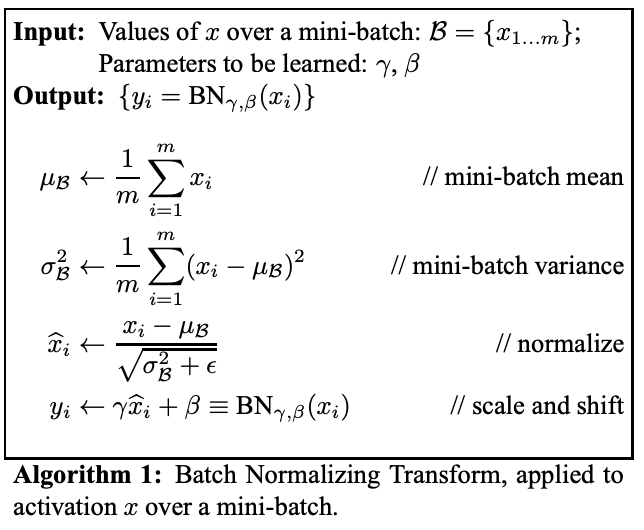

first operation calculates the mean of the inputs within a mini-batch. The result of the operation is a vector that contains each input’s mean.

‘m’ refers to the number of inputs in the mini-batch.

‘µ’ refers to the mean.

‘B’ is a subscript that refers to the current batch.

‘xi’ is an instance of the input data.

The mean(‘µ’) of a batch(‘B’) is calculated by the sum of the several input instances of the batch and dividing it by the total number of inputs(‘m’).

The input variance (σ²) is being calculated by squaring the standard deviations of the input. To calculate the standard deviations, we take each input instance(Xi) within the current mini-batch and subtract the mean(µB) of the mini-batch that was calculated in the previous operation and square the result.
This value is then squared to obtain the variance(σ).

Now we have all the required values for zero-centring and normalizing the inputs. In the operation above we are putting the input data through a process of standardization. The terms standardization and normalization can be used interchangeably. There is a subtle difference between the two terms.


In the operation above, the mean of the batch is subtracted from each input instant. Then we divide the result by the square root value of addition between the standard deviation value of the current batch and the smoothing term(ε).

In the last operation is where rescaling and offsetting the of the input values occurs. The output of this operation is the result of the BN algorithm on the current mini-batch.


In the final operation, we are introduced to two new components of the BN algorithm. The components are parameters vectors that are used for the scaling(γ) and shifting(β) of the vector containing values from the previous operations. The values of the parameter vectors for scaling and shifting are learnable parameters. During neural network training, BN ensures that the learnable parameters are the optimal values that enable accurate normalization of each mini-batch.

BN transformation is an effective method of increasing the performance of deep neural networks.

The smoothing term(ε) assures numerical stability within the operation by stopping a division by a zero value. The smoothing term is usually 0.00005.

#Required Libraries

In [4]:
from keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import MaxPooling2D, Conv2D
from tensorflow.keras.layers import BatchNormalization 


#Set Hyperparameters

In [28]:
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

#Data Pre-Processing

In [21]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Shape of the input sets
x_train_shape = x_train.shape
x_test_shape = x_test.shape

#Keras layer input shape
input_shape = (x_train_shape[1], x_train_shape[2], 1)
# print(input_shape)

#Reshape the training data to include channels
x_train = x_train.reshape(x_train_shape[0], x_train_shape[1], x_train_shape[2], 1)
# print("x_train after reshape: ", x_train)

x_test = x_test.reshape(x_test_shape[0], x_test_shape[1], x_test_shape[2], 1)
# print("x_test after reshape: ", x_test)

#Parse number as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalize input data
x_train = x_train/255
x_test = x_test/255


#Building a model without Batch Normalization between layers

In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(no_classes, activation = 'softmax'))

#Compile the model
model.compile(loss = tensorflow.keras.losses.sparse_categorical_crossentropy, 
              optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])

#Fit data to model
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = no_epochs, 
                    verbose = verbosity,
                    validation_split = validation_split)

#Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose = 1)

print(f"Test loss: {score[0]} / Test accuracy : {score[1]}")

Epoch 1/25
192/192 [==============================] - 36s 187ms/step - loss: 0.6607 - accuracy: 0.8268 - val_loss: 0.0849 - val_accuracy: 0.9767
Epoch 2/25
192/192 [==============================] - 35s 182ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0648 - val_accuracy: 0.9827
Epoch 3/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.0532 - val_accuracy: 0.9844
Epoch 4/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0527 - val_accuracy: 0.9860
Epoch 5/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 6/25
192/192 [==============================] - 35s 182ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0415 - val_accuracy: 0.9866
Epoch 7/25
192/192 [==============================] - 35s 181ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.0452 - val_ac

#Building Model with Adding Batch Normalization

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(no_classes, activation = 'softmax'))

In [36]:
#Compile the model
model.compile(loss = tensorflow.keras.losses.sparse_categorical_crossentropy, 
              optimizer = tensorflow.keras.optimizers.Adam(), metrics = ['accuracy'])

#Fit data to model
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = no_epochs, 
                    verbose = verbosity,
                    validation_split = validation_split)

#Generate generalization metrics
score = model.evaluate(x_test, y_test, verbose = 1)

print(f"Test loss: {score[0]} / Test accuracy : {score[1]}")

Epoch 1/25
192/192 [==============================] - 54s 275ms/step - loss: 0.3017 - accuracy: 0.9067 - val_loss: 5.9972 - val_accuracy: 0.1060
Epoch 2/25
192/192 [==============================] - 53s 276ms/step - loss: 0.0357 - accuracy: 0.9906 - val_loss: 3.6229 - val_accuracy: 0.1774
Epoch 3/25
192/192 [==============================] - 52s 272ms/step - loss: 0.0184 - accuracy: 0.9958 - val_loss: 0.2123 - val_accuracy: 0.9334
Epoch 4/25
192/192 [==============================] - 52s 272ms/step - loss: 0.0118 - accuracy: 0.9976 - val_loss: 0.0350 - val_accuracy: 0.9886
Epoch 5/25
192/192 [==============================] - 53s 274ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.0335 - val_accuracy: 0.9899
Epoch 6/25
192/192 [==============================] - 52s 271ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 7/25
192/192 [==============================] - 52s 271ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0365 - val_ac

Lets compare accuracy plots of both the training

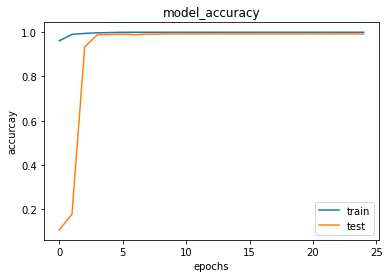

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epochs')
plt.ylabel('accurcay')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

#Conclusion

The accurcay is better when the batch normalization layer is added. The convergence is also better as compared to the model without batch normalization. After comparing the results we have come to a conclusion that adding the batch normalization between the layers of the network, the accurcay of the model improves. It also avoids the overfitting. Therefore batch normalization should be concidered while training the deep neural networks.